In [3]:
!wget -nc https://lazyprogrammer.me/course_files/all_stocks_5yr.csv

--2022-10-30 00:58:46--  https://lazyprogrammer.me/course_files/all_stocks_5yr.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29580549 (28M) [text/csv]
Saving to: ‘all_stocks_5yr.csv’

all_stocks_5yr.csv  100%[===================>]  28.21M  17.7MB/s    in 1.6s    

2022-10-30 00:58:48 (17.7 MB/s) - ‘all_stocks_5yr.csv’ saved [29580549/29580549]



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
 data = pd.read_csv('all_stocks_5yr.csv', parse_dates=True)

In [6]:
sbux = data[data['Name']== 'SBUX'].copy()
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


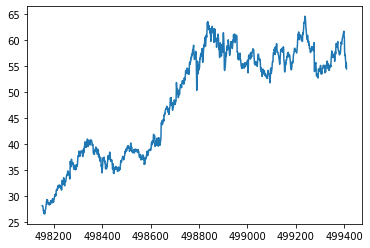

In [7]:
sbux['close'].plot();

In [8]:
sbux['prev_close'] = sbux['close'].shift(1)

In [9]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [10]:
sbux['return'] = sbux['close'] / sbux['prev_close'] - 1

In [11]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [12]:
sbux['return2'] = sbux['close'].pct_change(1)

In [13]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


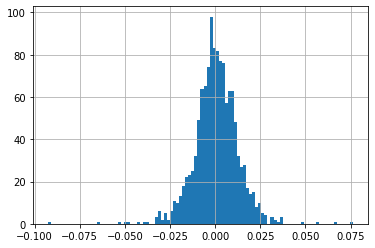

In [14]:
sbux['return'].hist(bins=100);

In [15]:
sbux['return'].mean(), sbux['return'].std()

(0.0006002332205830914, 0.012360934026133879)

In [16]:
sbux['log_return'] = np.log(sbux['return'] + 1)

In [17]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2,log_return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028


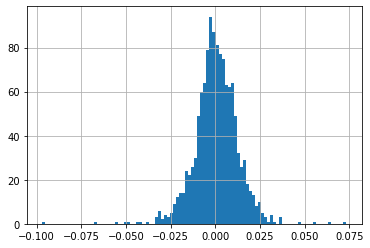

In [18]:
sbux['log_return'].hist(bins=100);

# Normal Distribution


In [19]:
 from scipy.stats import norm

In [20]:
x_list = np.linspace(sbux['return'].min(),sbux['return'].max(), 100)

In [21]:
y_list = norm.pdf(x_list, loc=sbux['return'].mean(), scale=sbux['return'].std())

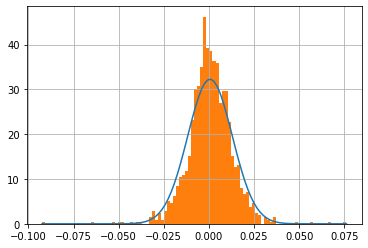

In [22]:
plt.plot(x_list, y_list);
sbux['return'].hist(bins=100, density=True);

In [23]:
from scipy.stats import probplot

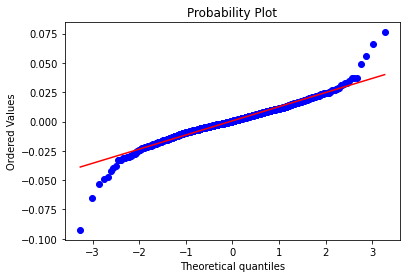

In [24]:
probplot(sbux['return'].dropna(), dist='norm', fit=True, plot=plt); 

In [25]:
import statsmodels.api as sm

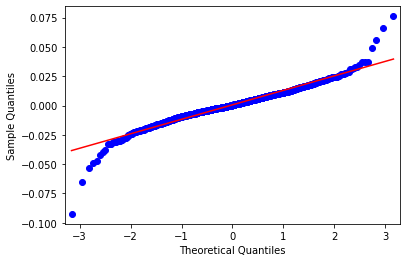

In [26]:
sm.qqplot(sbux['return'].dropna(), line='s');

In [27]:
x_list =np.linspace(
    sbux['log_return'].min (),
    sbux['log_return'].max())

In [28]:
y_list = norm.pdf(x_list,
                  loc=sbux['log_return'].mean(),
                  scale=sbux['log_return'].std())

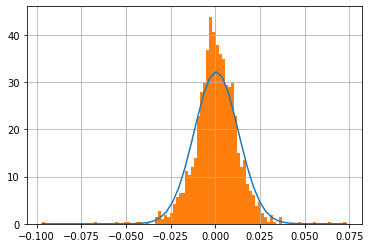

In [29]:
plt.plot(x_list, y_list);
sbux['log_return'].hist(bins=100, density=True);

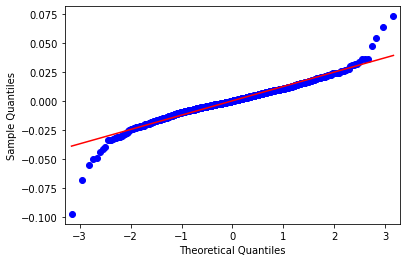

In [30]:
sm.qqplot(sbux['log_return'].dropna(), line='s');

# t-distribution

In [31]:
from scipy.stats import t 

In [32]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100)

In [33]:
params = t.fit(sbux['return'].dropna())

In [34]:
params

(4.78753221828017, 0.0007108616716254146, 0.009341981642040986)

In [35]:
df, loc, scale = params

In [36]:
y_list = t.pdf(x_list, df, loc, scale)

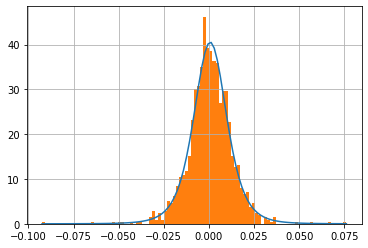

In [37]:
plt.plot(x_list, y_list);
sbux['return'].hist(bins=100, density=True);

In [38]:
sm.qqplot(sbux['return'].dropna(), dist=t, line='s');

TypeError: ignored

In [ ]:
probplot(sbux['return'].dropna(), dist='t', fit=True, plot=plt);

In [39]:
class myt:
  def __init__(self, df):
    self.df = df
  
  def fit(self, x):
    return t.fit(x)
  
  def ppf(self, x, loc=0, scale=1):
    return t.ppf(x, self.df, loc, scale)
  


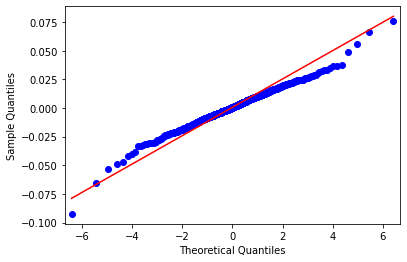

In [40]:
sm.qqplot(sbux['return'].dropna(), dist=myt(df), line='s');

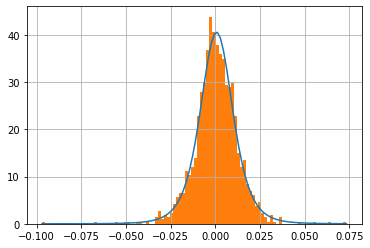

In [41]:
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100)

params = t.fit(sbux['log_return'].dropna())

df, loc, scale = params

y_list = t.pdf(x_list, df, loc, scale)

plt.plot(x_list, y_list);
sbux['log_return'].hist(bins=100, density=True);

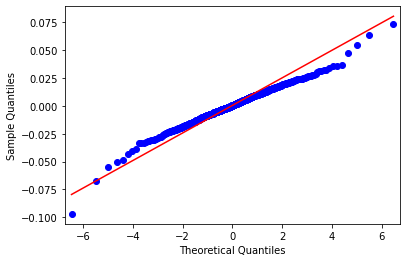

In [42]:
sm.qqplot(sbux['log_return'].dropna(), dist=myt(df), line='s');

# Skewness and Kurtosis

In [43]:
sbux['return'].skew()

-0.2680784195824153

In [44]:
sbux['return'].kurtosis()

5.593158903424731

In [45]:
sbux['log_return'].skew()

-0.41015501490182066

In [46]:
sbux['log_return'].kurtosis()

5.964502225799283

In [47]:
samp = pd.Series(np.random.randn(10000));
samp.skew(), samp.kurtosis()

(-6.878296693049777e-05, -0.031423956042097245)

# Confidence Interval

In [48]:
values = sbux['return'].dropna().to_numpy()

In [49]:
m = values.mean()
s = values.std(ddof=1)

In [50]:
low = m - 1.96 * s / np.sqrt(len(values))
high = m + 1.96 * s / np.sqrt(len(values))

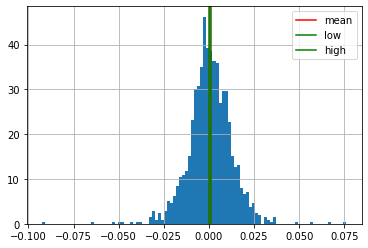

In [51]:
sbux['return'].hist(bins=100, density=True);
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.legend();

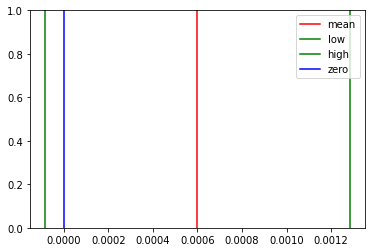

In [52]:
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.axvline(0, label='zero', color='blue');
plt.legend();

# Statistical Testing

## p-value
### null Hypothesis

In [53]:
from scipy.stats import jarque_bera, normaltest

In [54]:
jarque_bera(values)

Jarque_beraResult(statistic=1639.0284386552219, pvalue=0.0)

In [55]:
normaltest(values)

NormaltestResult(statistic=172.6819672061636, pvalue=3.1811727900119636e-38)

In [56]:
jarque_bera(sbux['log_return'].dropna())

Jarque_beraResult(statistic=1882.1814629047672, pvalue=0.0)

In [57]:
normaltest(sbux['log_return'].dropna())

NormaltestResult(statistic=198.54738937007733, pvalue=7.690989175882069e-44)

In [58]:
from scipy.stats import kstest

In [59]:
df, loc, scale = t.fit(values)

In [60]:
def cdf(x):
  return t.cdf(x, df, loc, scale)

kstest(values, cdf)

KstestResult(statistic=0.01887566203844726, pvalue=0.7537785475444063)

In [61]:
df, loc, scale = t.fit(sbux['log_return'].dropna())
def cdf(x):
  return t.cdf(x, df, loc, scale)

kstest(sbux['log_return'].dropna(), cdf)

KstestResult(statistic=0.01837990941957013, pvalue=0.7818301159274575)

In [62]:
from scipy.stats import ttest_1samp

In [63]:
ttest_1samp(values,0)

Ttest_1sampResult(statistic=1.7223010261810556, pvalue=0.08526098717694539)

In [64]:
ttest_1samp(sbux['log_return'].dropna(), 0)

Ttest_1sampResult(statistic=1.4999195047533647, pvalue=0.13388636615667793)

In [65]:
mmm = data[data['Name'] == 'MMM'].copy()

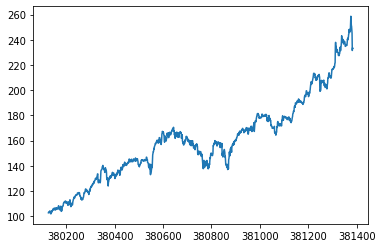

In [66]:
mmm['close'].plot();

In [67]:
mmm['pre_close'] = mmm['close'].shift(1)

In [68]:
mmm['return'] = mmm['close'] / mmm['pre_close'] - 1

In [69]:
mmm['log_return'] = np.log(mmm['return']+1)

In [70]:
mmm['return'].mean(), mmm['return'].std()

(0.0007001182500580143, 0.009768718404053094)

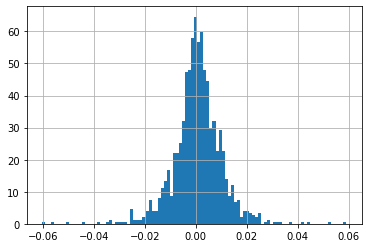

In [71]:
mmm['return'].hist(bins=100, density=True);

In [72]:
m = mmm['return'].mean()
s = mmm['return'].std(ddof=1)
low = m - 1.96 * s / np.sqrt(len(mmm['return']))
high = m + 1.96 * s / np.sqrt(len(mmm['return']))
print(low, high, m, s)

0.0001605072466054154 0.0012397292535106133 0.0007001182500580143 0.009768718404053094


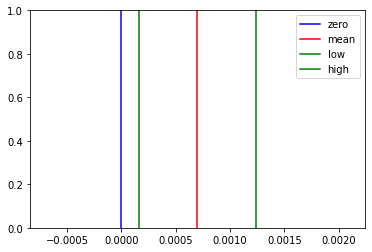

In [73]:
plt.xlim((low - 0.001, high + 0.001))
plt.axvline(0, label='zero', color='blue');
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.legend();

In [74]:
ttest_1samp(mmm['return'].dropna(), 0)

Ttest_1sampResult(statistic=2.541991701703365, pvalue=0.011141496531324404)

In [75]:
ttest_1samp(mmm['log_return'].dropna(), 0)

Ttest_1sampResult(statistic=2.365963115873947, pvalue=0.018134246809755054)

# Covariance and Correlation


In [79]:
!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv

--2022-10-30 00:59:53--  https://lazyprogrammer.me/course_files/sp500_close.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4143332 (4.0M) [text/csv]
Saving to: ‘sp500_close.csv’

sp500_close.csv     100%[===================>]   3.95M  5.59MB/s    in 0.7s    

2022-10-30 00:59:54 (5.59 MB/s) - ‘sp500_close.csv’ saved [4143332/4143332]



In [80]:
close = pd.read_csv('sp500_close.csv')

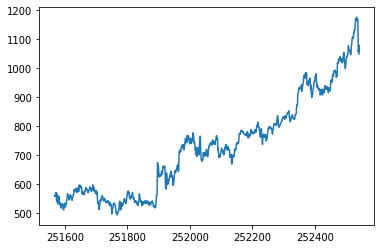

In [81]:
goog = data[data['Name'] == 'GOOG']
goog['close'].plot();

In [83]:
len(goog)

975

In [84]:
 symbols = ['AAPL', 'GOOG', 'IBM', 'NFLX', 'SBUX']
 sub = close[symbols].copy()

In [86]:
sub.dropna(axis=0, how='all', inplace=True)

In [87]:
sub.head()

,AAPL,GOOG,IBM,NFLX,SBUX
0,67.8542,NaN,201.68,25.8528,28.185
3,68.5614,NaN,200.16,25.4128,28.070
4,66.8428,NaN,200.04,25.4214,28.130
5,66.7156,NaN,200.09,26.6098,27.915
6,66.6556,NaN,199.65,26.7714,27.775


In [88]:
for symbol in symbols:
  sub[symbol + '_prev'] = sub[symbol].shift(1)
  sub[symbol + '_ret' ] = sub[symbol] / sub[symbol + '_prev'] - 1

In [89]:
rets = sub[[symbol + '_ret' for symbol in symbols]].copy()

In [90]:
rets.head()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
0,NaN,NaN,NaN,NaN,NaN
3,0.010422,NaN,-0.007537,-0.017019,-0.004080
4,-0.025067,NaN,-0.000600,0.000338,0.002138
5,-0.001903,NaN,0.000250,0.046748,-0.007643
6,-0.000899,NaN,-0.002199,0.006073,-0.005015


In [91]:
import seaborn as sns

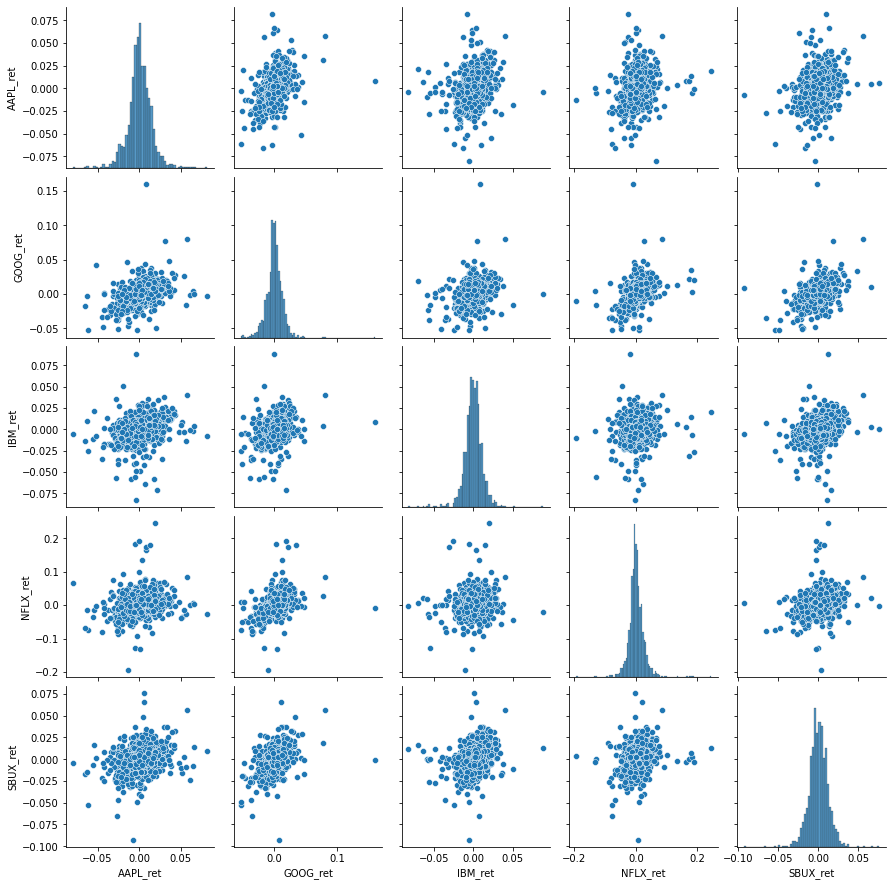

In [92]:
sns.pairplot(rets);

In [93]:
rets.mean()

AAPL_ret    0.000786
GOOG_ret    0.000745
IBM_ret    -0.000144
NFLX_ret    0.002217
SBUX_ret    0.000600
dtype: float64

In [94]:
rets.std()

AAPL_ret    0.014593
GOOG_ret    0.014069
IBM_ret     0.011876
NFLX_ret    0.027353
SBUX_ret    0.012361
dtype: float64

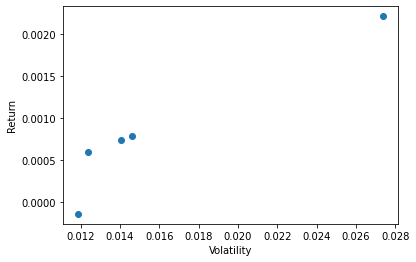

In [96]:
plt.scatter(rets.std(), rets.mean())
plt.xlabel('Volatility')
plt.ylabel('Return');

In [97]:
rets.corr()


,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
AAPL_ret,1.000000,0.415487,0.263927,0.227387,0.307716
GOOG_ret,0.415487,1.000000,0.345643,0.404768,0.455936
IBM_ret,0.263927,0.345643,1.000000,0.163267,0.315263
NFLX_ret,0.227387,0.404768,0.163267,1.000000,0.266012
SBUX_ret,0.307716,0.455936,0.315263,0.266012,1.000000


In [98]:
rets.cov()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
AAPL_ret,0.000213,0.000084,0.000046,0.000091,0.000056
GOOG_ret,0.000084,0.000198,0.000058,0.000151,0.000079
IBM_ret,0.000046,0.000058,0.000141,0.000053,0.000046
NFLX_ret,0.000091,0.000151,0.000053,0.000748,0.000090
SBUX_ret,0.000056,0.000079,0.000046,0.000090,0.000153
